# Projet de fin d'étude (PFE) : Classification De Sons de Percussions
Un projet réalisé par [Mlamali SAID SALIMO](https://www.linkedin.com/in/mlamalisaidsalimo/), étudiant-ingénieur en IA, à CY Tech.

## Sommaire

Ce projet est divisé en six notebooks, chacun dédié à une étape spécifique du développement de notre outil de classification audio.

- **[1 Introduction & Data Preparation.ipynb](./1.%20Introduction%20%26%20Data%20Preparation.ipynb)** : *Présentation du projet et préparation des données pour les étapes ultérieures.*
- **[2. Features Extraction - Hand-crafted Features.ipynb](./2.%20Features%20Extraction%20-%20Hand-crafted%20Features.ipynb)** : *Extraction de caractéristiques audio pertinentes pour la classification.*
- **[3. Data Cleaning.ipynb](./3.%20Data%20Cleaning.ipynb)** : *Nettoyage des données pour garantir leur fiabilité lors de l'entraînement de nos modèles.*
- **[4. Exploratory Data Analysis (EDA).ipynb](./4.%20Exploratory%20Data%20Analysis%20%28EDA%29.ipynb)** : *Analyse exploratoire des données pour en comprendre les caractéristiques et les tendances.*
- **[5. Data Augmentation.ipynb](./5.%20Data%20Augmentation.ipynb)** : *Augmentation de nos données pour améliorer la robustesse de notre modèle de classification.*
- **[6. ML Models & Conclusion.ipynb](./6.%20ML%20Models%20%26%20Conclusion.ipynb)** : *Entraînement de modèles d'apprentissage automatique pour la classification des sons de percussion.*

# Notebook (7) - "ML Models & Conclusion


Dans ce dernier notebook, nous allons entrainer plusieurs modèles de machine learning sur les données préparées dans le notebook précédent.

Les modèles que nous allons entrainer sont les suivants:
- SVC
- Random Forest
- LGMB

Ce sont ces modèles que nous essaierons d'optimiser avec une recherche de paramètres par validation croisée.

Enfin, nous conclurons sur mon PFE, les résultats obtenus et les perspectives d'amélioration.

## Set up Google Drive

In [110]:
SET_UP_GOOGLE_DRIVE = False

PROJECT_PATH = "."
if SET_UP_GOOGLE_DRIVE:
    from google.colab import drive

    drive.mount('/content/gdrive')

    PROJECT_PATH = "/content/gdrive/Shareddrives/PFE - ING3 Mlamali/DrumClassifier - Project"
    import sys

    sys.path.append(PROJECT_PATH)

PROJECT_PATH

'.'

In [111]:
from params import SOUNDS_DATASET_PATH, SAMPLE_RATE, CLASS_COLORS

if SET_UP_GOOGLE_DRIVE:
    SOUNDS_DATASET_PATH = "/content/gdrive/Shareddrives/PFE - ING3 Mlamali/DrumClassifier - Sounds Dataset"
SOUNDS_DATASET_PATH

'G:\\Shared drives\\PFE - ING3 Mlamali\\DrumClassifier - Sounds Dataset'

## Imports - librairies

In [112]:
try:
    import lazypredict
    import dataframe_image as dfi
except:
    !pip install lazypredict
    !pip install dataframe_image
    import lazypredict
    import dataframe_image as dfi

In [113]:
import pandas as pd
import numpy as np
import re

import seaborn as sns  # library for visualization

sns.set_style("darkgrid")
import matplotlib.pyplot as plt  # library for visualization
%matplotlib inline

from tqdm import tqdm
from tools import *

tqdm.pandas()
import os
from glob import glob
import random
from datetime import datetime

from typing import List, Tuple, Dict, Union

from concurrent.futures import ThreadPoolExecutor, as_completed
import pickle
import warnings
import re

In [114]:

#importing essential libraries
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, recall_score, \
    precision_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc, f1_score
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from itertools import cycle




## Dataset

### Chargement

In [115]:
now_day_str = "20230511"
MIN_SAMPLES_PER_CLASS = 2000
df_drums = pd.read_csv(
    os.path.join(SOUNDS_DATASET_PATH.replace("\\", "/"),
                 f'dataset_features_cleaned_augmented_{MIN_SAMPLES_PER_CLASS}_{now_day_str}.csv'),
    dtype={"orig_file_path": str})
df_drums.set_index("file_path", inplace=True)
df_drums

,file_name,file_extension,class,split,duration,rms_log_sum,rms_log_mean,rms_log_max,rms_log_std,rms_log_diff_abs_mean,...,spec_flatness_mean,spec_flatness_std,spec_rolloff_85_mean,spec_rolloff_85_std,spec_rolloff_15_mean,spec_rolloff_15_std,spec_contrast_mean,spec_contrast_std,orig_file_path,is_augmented
file_path,,,,,,,,,,,,,,,,,,,,,
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker (86).wav,Shaker (86),.wav,Shaker,train,0.27,-67.92,-2.83,-0.98,1.16,0.20,...,0.24,0.06,18053.80,1393.81,5028.00,3072.53,13.64,3.42,NaN,0
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\shaker (2) (2).wav,shaker (2) (2),.wav,Shaker,train,2.82,-1251.78,-5.13,-0.59,1.71,0.04,...,0.81,0.37,2866.56,5542.88,536.39,1097.45,9.79,3.06,NaN,0
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker (85).wav,Shaker (85),.wav,Shaker,train,0.09,-13.05,-1.63,-1.03,0.48,0.32,...,0.15,0.05,16413.68,1311.13,5151.82,1894.67,15.12,7.90,NaN,0
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker 2 (6).wav,Shaker 2 (6),.wav,Shaker,train,0.20,-31.09,-1.73,-0.71,0.79,0.23,...,0.15,0.02,14054.00,650.57,4562.65,283.85,13.88,5.30,NaN,0
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\PBJ Perc - Shaker.wav,PBJ Perc - Shaker,.wav,Shaker,train,0.46,-94.65,-2.37,-1.16,0.57,0.11,...,0.02,0.01,12849.40,672.12,5931.32,1290.22,19.73,9.12,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Snap\BVKER - Footsteps Snap 01@augmented__noise_1__ts_1__ps_1__pi_1__rg_1__20230516170009.wav,NaN,NaN,Snap,train,0.12,-32.90,-2.99,-0.75,1.63,0.49,...,0.17,0.13,15848.44,2051.22,2662.29,531.06,16.98,12.94,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,1
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Snap\[PS] Go-to Snap (r&b)@augmented__noise_1__ts_1__ps_1__ts_1__20230516170009.wav,NaN,NaN,Snap,train,0.50,-103.17,-2.34,-1.32,0.35,0.08,...,0.16,0.07,15865.08,2182.46,3208.45,488.75,17.89,13.21,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,1
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Snap\Snap (4)@augmented__ps_1__pi_1__rg_1__20230516170009.wav,NaN,NaN,Snap,train,0.12,-16.16,-1.47,-0.73,0.83,0.30,...,0.00,0.00,5904.01,740.76,1329.19,193.49,18.68,17.78,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,1


### Noms des colonnes

In [116]:
print(f'Nombre de colonnes: {len(df_drums.columns)}')
df_drums.columns

Nombre de colonnes: 104


Index(['file_name', 'file_extension', 'class', 'split', 'duration',
       'rms_log_sum', 'rms_log_mean', 'rms_log_max', 'rms_log_std',
       'rms_log_diff_abs_mean',
       ...
       'spec_flatness_mean', 'spec_flatness_std', 'spec_rolloff_85_mean',
       'spec_rolloff_85_std', 'spec_rolloff_15_mean', 'spec_rolloff_15_std',
       'spec_contrast_mean', 'spec_contrast_std', 'orig_file_path',
       'is_augmented'],
      dtype='object', length=104)

In [117]:
columns_by_prefix = get_columns_by_prefix_(df_drums.columns)
columns_by_prefix

{'orig': ['orig_file_path'],
 'class': ['class'],
 'pitch': ['pitch'],
 'split': ['split'],
 'spec': ['spec_cent_mean',
  'spec_cent_std',
  'spec_bw_mean',
  'spec_bw_std',
  'spec_flatness_mean',
  'spec_flatness_std',
  'spec_rolloff_85_mean',
  'spec_rolloff_85_std',
  'spec_rolloff_15_mean',
  'spec_rolloff_15_std',
  'spec_contrast_mean',
  'spec_contrast_std'],
 'is': ['is_augmented'],
 'attack': ['attack_time'],
 'rms': ['rms_log_sum',
  'rms_log_mean',
  'rms_log_max',
  'rms_log_std',
  'rms_log_diff_abs_mean',
  'rms_log_crest_factor'],
 'zcr': ['zcr_sum', 'zcr_mean', 'zcr_std', 'zcr_loudest_frame'],
 'file': ['file_name', 'file_extension'],
 'mfcc': ['mfcc_mean_1',
  'mfcc_mean_2',
  'mfcc_mean_3',
  'mfcc_mean_4',
  'mfcc_mean_5',
  'mfcc_mean_6',
  'mfcc_mean_7',
  'mfcc_mean_8',
  'mfcc_mean_9',
  'mfcc_mean_10',
  'mfcc_mean_11',
  'mfcc_mean_12',
  'mfcc_std_1',
  'mfcc_std_2',
  'mfcc_std_3',
  'mfcc_std_4',
  'mfcc_std_5',
  'mfcc_std_6',
  'mfcc_std_7',
  'mfcc_std_

### Verification des types de données et correction

In [118]:
df_drums.dtypes

file_name               object
file_extension          object
class                   object
split                   object
duration               float64
                        ...   
spec_rolloff_15_std    float64
spec_contrast_mean     float64
spec_contrast_std      float64
orig_file_path          object
is_augmented             int64
Length: 104, dtype: object

In [119]:
df_drums["is_augmented"] = df_drums["is_augmented"].astype(bool)

### Features columns

In [120]:
# get columns names with float type use .info()
features_columns = [k for k, v in df_drums.dtypes.to_dict().items() if v == 'float64' or v == 'int64']
if 'is_augmented' in features_columns:
    features_columns.remove('is_augmented')

print(f"Nombre de features: {len(features_columns)}")
get_columns_by_prefix_(features_columns)

Nombre de features: 98


{'pitch': ['pitch'],
 'spec': ['spec_cent_mean',
  'spec_cent_std',
  'spec_bw_mean',
  'spec_bw_std',
  'spec_flatness_mean',
  'spec_flatness_std',
  'spec_rolloff_85_mean',
  'spec_rolloff_85_std',
  'spec_rolloff_15_mean',
  'spec_rolloff_15_std',
  'spec_contrast_mean',
  'spec_contrast_std'],
 'attack': ['attack_time'],
 'rms': ['rms_log_sum',
  'rms_log_mean',
  'rms_log_max',
  'rms_log_std',
  'rms_log_diff_abs_mean',
  'rms_log_crest_factor'],
 'zcr': ['zcr_sum', 'zcr_mean', 'zcr_std', 'zcr_loudest_frame'],
 'mfcc': ['mfcc_mean_1',
  'mfcc_mean_2',
  'mfcc_mean_3',
  'mfcc_mean_4',
  'mfcc_mean_5',
  'mfcc_mean_6',
  'mfcc_mean_7',
  'mfcc_mean_8',
  'mfcc_mean_9',
  'mfcc_mean_10',
  'mfcc_mean_11',
  'mfcc_mean_12',
  'mfcc_std_1',
  'mfcc_std_2',
  'mfcc_std_3',
  'mfcc_std_4',
  'mfcc_std_5',
  'mfcc_std_6',
  'mfcc_std_7',
  'mfcc_std_8',
  'mfcc_std_9',
  'mfcc_std_10',
  'mfcc_std_11',
  'mfcc_std_12',
  'mfcc_max_1',
  'mfcc_max_2',
  'mfcc_max_3',
  'mfcc_max_4',
  '

In [121]:
not_features_columns = df_drums.columns[~df_drums.columns.isin(features_columns)].tolist()
not_features_columns

['file_name',
 'file_extension',
 'class',
 'split',
 'orig_file_path',
 'is_augmented']

In [122]:
df_drums[features_columns].head()

,duration,rms_log_sum,rms_log_mean,rms_log_max,rms_log_std,rms_log_diff_abs_mean,rms_log_crest_factor,zcr_sum,zcr_mean,zcr_std,...,spec_bw_mean,spec_bw_std,spec_flatness_mean,spec_flatness_std,spec_rolloff_85_mean,spec_rolloff_85_std,spec_rolloff_15_mean,spec_rolloff_15_std,spec_contrast_mean,spec_contrast_std
file_path,,,,,,,,,,,,,,,,,,,,,
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker (86).wav,0.27,-67.92,-2.83,-0.98,1.16,0.20,1.85,10.73,0.45,0.12,...,5551.95,1167.82,0.24,0.06,18053.80,1393.81,5028.00,3072.53,13.64,3.42
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\shaker (2) (2).wav,2.82,-1251.78,-5.13,-0.59,1.71,0.04,4.54,9.93,0.04,0.08,...,1086.46,2078.20,0.81,0.37,2866.56,5542.88,536.39,1097.45,9.79,3.06
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker (85).wav,0.09,-13.05,-1.63,-1.03,0.48,0.32,0.60,3.18,0.40,0.18,...,4920.18,451.14,0.15,0.05,16413.68,1311.13,5151.82,1894.67,15.12,7.90
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker 2 (6).wav,0.20,-31.09,-1.73,-0.71,0.79,0.23,1.02,6.75,0.38,0.07,...,4302.72,132.40,0.15,0.02,14054.00,650.57,4562.65,283.85,13.88,5.30
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\PBJ Perc - Shaker.wav,0.46,-94.65,-2.37,-1.16,0.57,0.11,1.21,14.03,0.35,0.08,...,3757.18,245.43,0.02,0.01,12849.40,672.12,5931.32,1290.22,19.73,9.12


### Valeurs manquantes
Dernière vérification des valeurs manquantes

In [123]:
df_drums.isnull().any()

file_name               True
file_extension          True
class                  False
split                  False
duration               False
                       ...  
spec_rolloff_15_std    False
spec_contrast_mean     False
spec_contrast_std      False
orig_file_path          True
is_augmented           False
Length: 104, dtype: bool

In [124]:
df_drums.columns[df_drums.isna().any()]

Index(['file_name', 'file_extension', 'mfcc_skew_1', 'mfcc_skew_2',
       'mfcc_skew_3', 'mfcc_skew_4', 'mfcc_skew_5', 'mfcc_skew_6',
       'mfcc_skew_7', 'mfcc_skew_8', 'mfcc_skew_9', 'mfcc_skew_10',
       'mfcc_skew_11', 'mfcc_skew_12', 'mfcc_kurtosis_1', 'mfcc_kurtosis_2',
       'mfcc_kurtosis_3', 'mfcc_kurtosis_4', 'mfcc_kurtosis_5',
       'mfcc_kurtosis_6', 'mfcc_kurtosis_7', 'mfcc_kurtosis_8',
       'mfcc_kurtosis_9', 'mfcc_kurtosis_10', 'mfcc_kurtosis_11',
       'mfcc_kurtosis_12', 'orig_file_path'],
      dtype='object')

<Axes: >

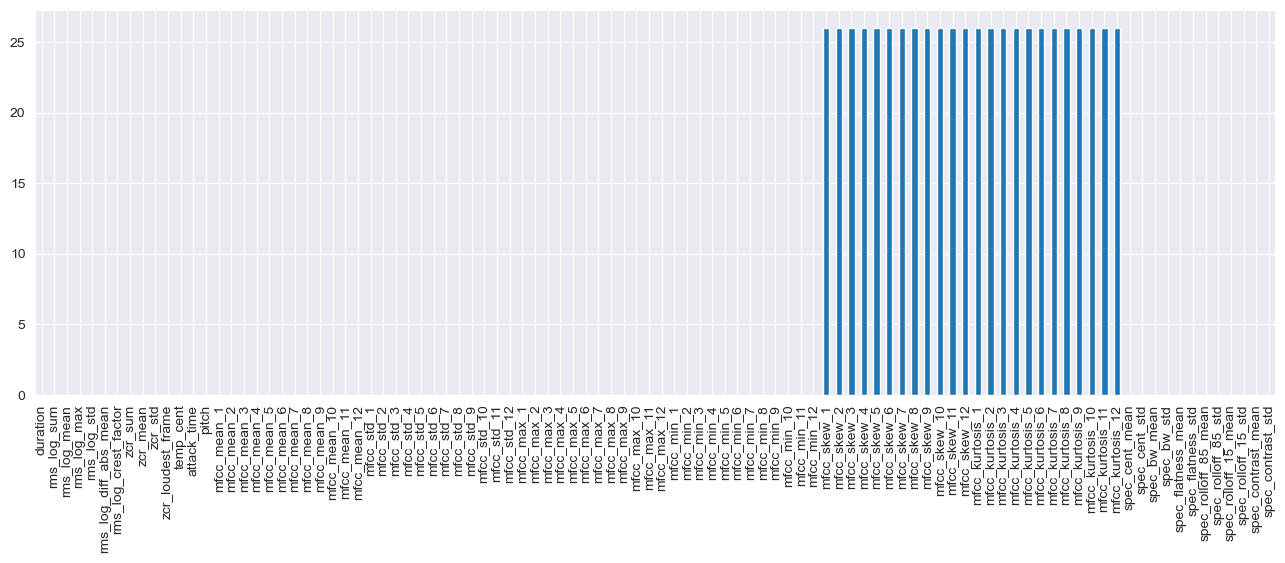

In [125]:
# count missing values per column (in features columns)
df_drums[features_columns].isna().sum().plot(kind='bar', figsize=(16, 5))

In [126]:
# display rows with missing values in features columns
df_drums[df_drums[features_columns].isna().any(axis=1)]

,file_name,file_extension,class,split,duration,rms_log_sum,rms_log_mean,rms_log_max,rms_log_std,rms_log_diff_abs_mean,...,spec_flatness_mean,spec_flatness_std,spec_rolloff_85_mean,spec_rolloff_85_std,spec_rolloff_15_mean,spec_rolloff_15_std,spec_contrast_mean,spec_contrast_std,orig_file_path,is_augmented
file_path,,,,,,,,,,,,,,,,,,,,,
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Hat Open (Cymbal)\[OPEN-HATS] Nxsty UK Drill Kit V2 (1).wav,[OPEN-HATS] Nxsty UK Drill Kit V2 (1),.wav,Hat Open (Cymbal),train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Ride (Cymbal)\VIP PRODUCERS - FPC_Ride_GLite_004.wav,VIP PRODUCERS - FPC_Ride_GLite_004,.wav,Ride (Cymbal),train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Ride (Cymbal)\VIP PRODUCERS - FPC_Ride_FDrk_004.wav,VIP PRODUCERS - FPC_Ride_FDrk_004,.wav,Ride (Cymbal),train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\Afro 808 Conga.wav,Afro 808 Conga,.wav,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\808 Conga.wav,808 Conga,.wav,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\Afro 808 Conga@augmented__noise_1__ts_1__ps_1__pi_1__rg_1__ts_1__20230516160654.wav,NaN,NaN,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,True
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\808 Conga@augmented__noise_1__ts_1__ps_1__pi_1__rg_1__ts_1__20230516160731.wav,NaN,NaN,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,True
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\Afro 808 Conga@augmented__noise_1__ts_1__ps_1__pi_1__rg_1__ts_1__20230516160737.wav,NaN,NaN,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,True
G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Conga\808 Conga@augmented__noise_1__ps_1__ts_1__20230516160823.wav,NaN,NaN,Conga,train,0.05,-30.00,-6.00,-6.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,G:\Shared drives\PFE - ING3 Mlamali\DrumClassi...,True


<Axes: >

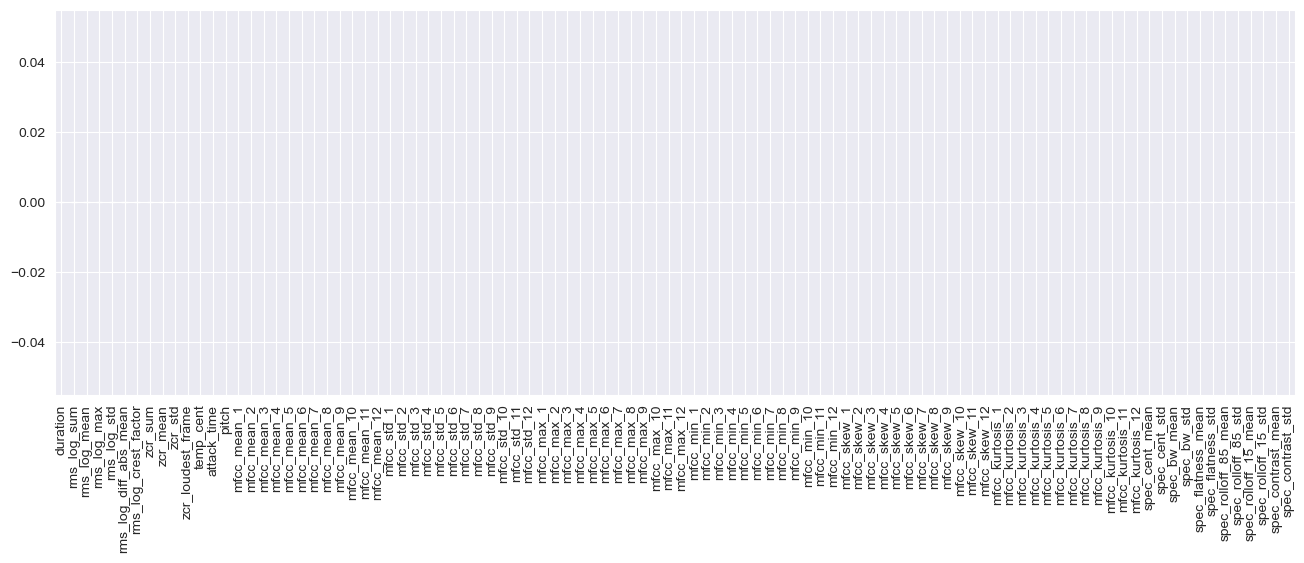

In [127]:
# drop rows with any missing values in features columns
df_drums.dropna(subset=features_columns, inplace=True)
# count missing values per column (in features columns)
df_drums[features_columns].isna().sum().plot(kind='bar', figsize=(16, 5))

### Aperçu des données

#### Information

In [128]:
df_drums.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 29383 entries, G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Shaker\Shaker (86).wav to G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset\Snap\Snap (18)@augmented__ts_1__ps_1__pi_1__rg_1__ir_1__ts_1__20230516170009.wav
Data columns (total 104 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    file_name              9436 non-null   object 
 1    file_extension         9436 non-null   object 
 2    class                  29383 non-null  object 
 3    split                  29383 non-null  object 
 4    duration               29383 non-null  float64
 5    rms_log_sum            29383 non-null  float64
 6    rms_log_mean           29383 non-null  float64
 7    rms_log_max            29383 non-null  float64
 8    rms_log_std            29383 non-null  float64
 9    rms_log_diff_abs_mean  29383 non-null  float64
 10   rms_log_crest_factor 

#### Statistiques descriptives

In [129]:
df_drums.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,29383.00,1.77,2.62,0.05,0.32,0.75,2.12,32.44
rms_log_sum,29383.00,-433.92,792.96,-19702.31,-467.70,-146.27,-48.36,62.28
rms_log_mean,29383.00,-2.39,1.08,-16.22,-3.13,-2.27,-1.57,0.32
rms_log_max,29383.00,-0.62,0.38,-4.09,-0.83,-0.59,-0.35,0.81
rms_log_std,29383.00,1.12,0.64,0.02,0.61,0.98,1.61,9.15
...,...,...,...,...,...,...,...,...
spec_rolloff_85_std,29383.00,3061.31,2262.48,0.00,1132.63,2562.63,4718.72,10482.75
spec_rolloff_15_mean,29383.00,1608.73,1576.76,0.63,297.16,1203.39,2412.16,13330.11
spec_rolloff_15_std,29383.00,689.65,727.18,0.00,118.80,490.23,1059.73,8177.05
spec_contrast_mean,29383.00,18.07,3.44,7.24,15.48,17.81,20.25,33.94


Les features ont une variance élevée et doivent donc être normalisées

## Train/Test Split Dataset



In [130]:
df_drums.split.value_counts()

train    27974
test      1409
Name: split, dtype: int64

On sépare enfin le dataset en trainset et testset

In [131]:
df_train_augmented = df_drums.query('`split` == "train"').loc[:, features_columns + ["class", "is_augmented"]]
df_train_no_augmented = df_drums.query('`split` == "train" and `is_augmented` == False').loc[:,
                        features_columns + ["class"]]
df_test = df_drums.query('`split` == "test"').loc[:, features_columns + ["class"]]

print(df_train_augmented.shape)
print(df_train_no_augmented.shape)
print(df_test.shape)

(27974, 100)
(8027, 99)
(1409, 99)


## Distribution des classes

In [132]:
print(f"{df_drums['class'].nunique()} classes")
class_names = df_drums['class'].unique().tolist()
class_names

14 classes


['Shaker',
 'Bell',
 '808',
 'Snap',
 'Kick',
 'Hat Open (Cymbal)',
 'Ride (Cymbal)',
 'Crash (Cymbal)',
 'Hat Closed (Cymbal)',
 'Metal',
 'Conga',
 'Tom',
 'Clap',
 'Snare']

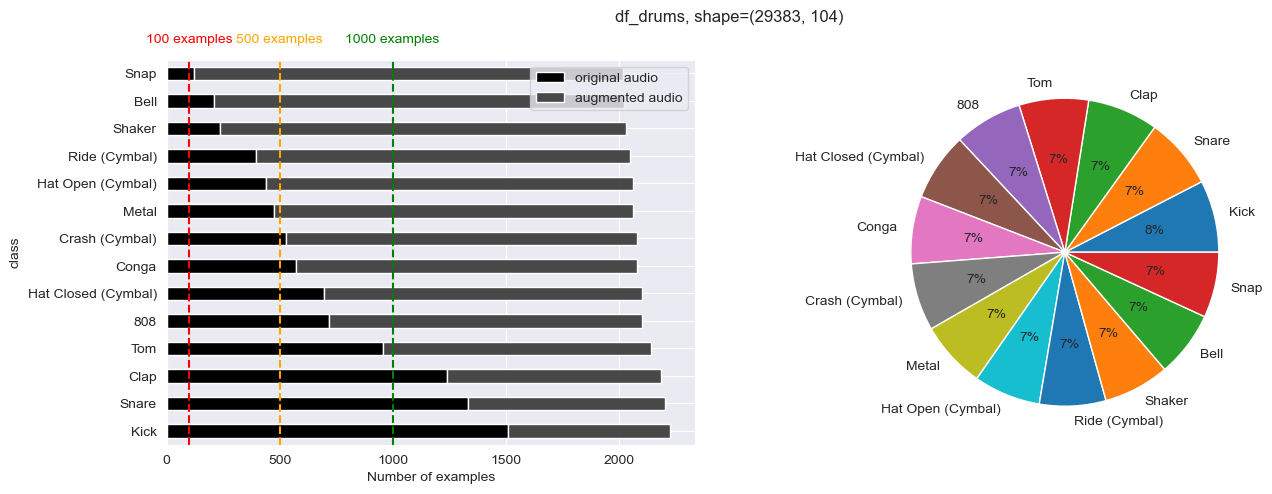

,original audio,augmented audio
class,,
Kick,1509,717
Snare,1333,870
Clap,1242,944
Tom,956,1187
808,720,1384
Hat Closed (Cymbal),695,1408
Conga,573,1510
Crash (Cymbal),528,1552
Metal,475,1590


In [133]:
def plot_class_distribution(df, class_column="class", augmented_column=None, figsize=(15, 5), threshold1=100,
                            threshold2=500, threshold3=1000, title=None):
    """
    Plot the distribution of class labels in a dataframe.

    Parameters:
        -- df (pandas DataFrame): The input dataframe.
        -- class_column (str): The name of the column containing the class labels.
        -- figsize (tuple, optional): The size of the figure. Default is (15, 5).
        -- threshold1 (int, optional): The threshold for the first vertical line. Default is 100.
        -- threshold2 (int, optional): The threshold for the second vertical line. Default is 500.
        -- threshold3 (int, optional): The threshold for the third vertical line. Default is 1000.
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    if title:
        fig.suptitle(title)

    if augmented_column is None or augmented_column not in df.columns:
        #print("No augmented column")
        # Plot the bar chart
        df[class_column].value_counts().plot(kind='barh', ax=ax1, color='black')

    else:
        # Count the number of original and augmented examples for each class
        counts = df.groupby([class_column, augmented_column]).size().unstack(fill_value=0)
        # rename columns
        counts.columns = ['original audio', 'augmented audio'] if len(counts.columns) == 2 else ['original audio']
        counts['total'] = counts.sum(axis=1) if len(counts.columns) == 2 else counts['original audio']
        # Trier les valeurs par ordre croissant de count
        counts = counts.sort_values(by=['total', "original audio"], ascending=False)
        counts.drop('total', axis=1, inplace=True)

        # Plot the bar chart
        counts.plot(kind='barh', stacked=True, ax=ax1, color=['black', '#' + "48" * 3])
        ax1.set_xlabel('Number of examples')
        ax1.set_ylabel(class_column)

    # Plot the pie chart
    df[class_column].value_counts().plot(kind='pie', ax=ax2, autopct='%.0f%%')
    ax2.set_ylabel('')

    max_samples_per_class = df[class_column].value_counts().max()
    min_samples_per_class = df[class_column].value_counts().min()

    # vertical lines and text annotations
    h = df[class_column].nunique()
    if threshold1:
        ax1.axvline(threshold1, color='r', linestyle='--')
        ax1.text(threshold1, h, f"{threshold1} examples", fontsize=10, va="bottom", ha="center", color="r")
    if threshold2:
        ax1.axvline(threshold2, color='orange', linestyle='--')
        ax1.text(threshold2, h, f"{threshold2} examples", fontsize=10, va="bottom", ha="center", color="orange")
    if threshold3:
        ax1.axvline(threshold3, color='g', linestyle='--')
        ax1.text(threshold3, h, f"{threshold3} examples", fontsize=10, va="bottom", ha="center", color="g")

    plt.show()

    now_str = datetime.now().strftime("%Y%m%d")
    fig.savefig(
        f"{PROJECT_PATH}/plots/class distribution - {title}, s_per_class=[{min_samples_per_class},{max_samples_per_class}] {now_str}.png",
        bbox_inches='tight')

    return counts if augmented_column is not None else df[class_column].value_counts()


plot_class_distribution(df_drums, title=f"df_drums, shape={df_drums.shape}", augmented_column="is_augmented")

### Sur le trainset

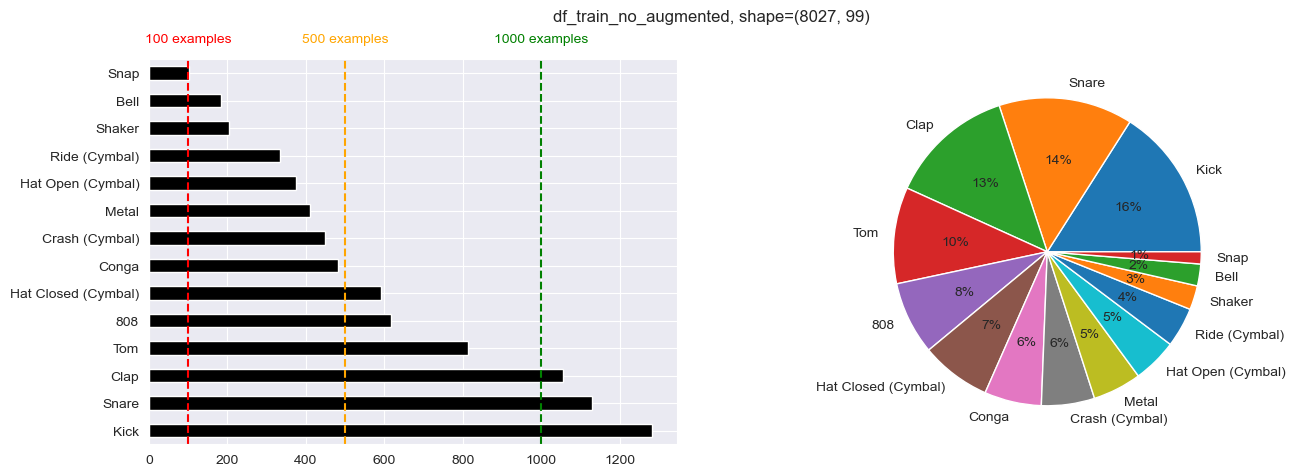

Kick                   1283
Snare                  1130
Clap                   1056
Tom                     813
808                     616
Hat Closed (Cymbal)     592
Conga                   481
Crash (Cymbal)          448
Metal                   410
Hat Open (Cymbal)       374
Ride (Cymbal)           335
Shaker                  203
Bell                    184
Snap                    102
Name: class, dtype: int64

In [134]:
plot_class_distribution(df_train_no_augmented, title=f"df_train_no_augmented, shape={df_train_no_augmented.shape}")

On a un jeu de données très déséquilibré, avec des classes qui ont très peu d'exemples.

### Sur le trainset augmenté

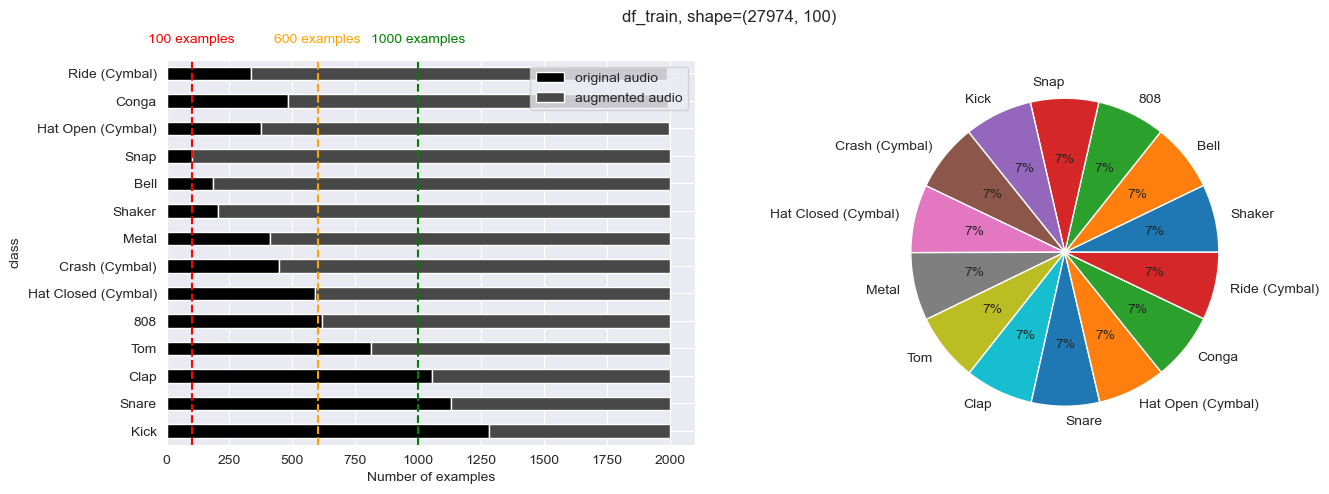

,original audio,augmented audio
class,,
Kick,1283,717
Snare,1130,870
Clap,1056,944
Tom,813,1187
808,616,1384
Hat Closed (Cymbal),592,1408
Crash (Cymbal),448,1552
Metal,410,1590
Shaker,203,1797


In [135]:
plot_class_distribution(df_train_augmented, title=f"df_train, shape={df_train_augmented.shape}",
                        augmented_column="is_augmented", threshold2=600)

### Sur le testset

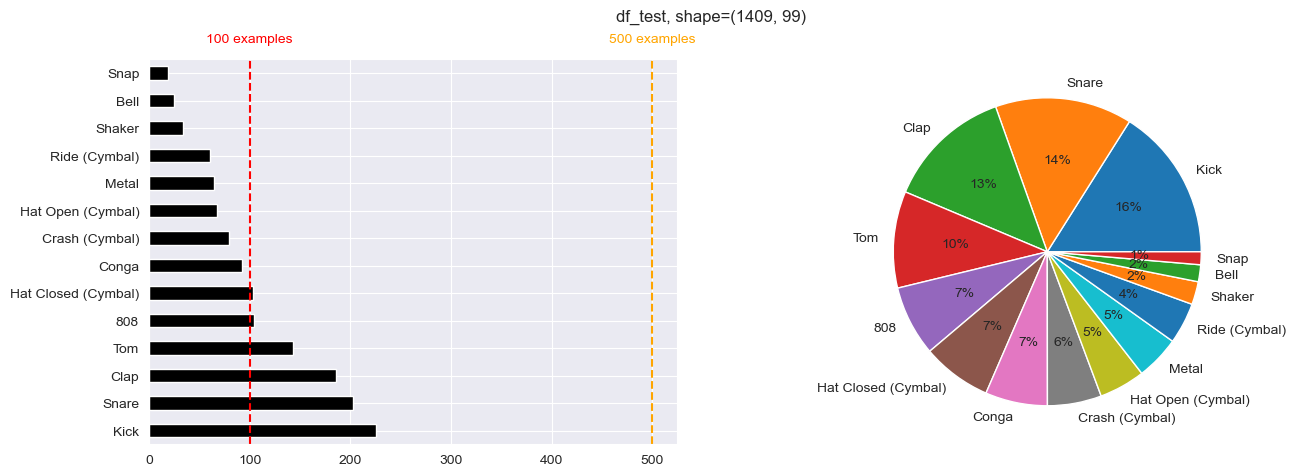

Kick                   226
Snare                  203
Clap                   186
Tom                    143
808                    104
Hat Closed (Cymbal)    103
Conga                   92
Crash (Cymbal)          80
Hat Open (Cymbal)       68
Metal                   65
Ride (Cymbal)           61
Shaker                  34
Bell                    25
Snap                    19
Name: class, dtype: int64

In [136]:
plot_class_distribution(df_test, "class", title=f"df_test, shape={df_test.shape}", threshold3=None)

## Gérer le nombre d'exemples par classe

Pour le projet, on va entrainer nos modèles avec différent trainset (équilibré, déséquilibré, augmentation, pas d'augmentation, beaucoup d'exemples par classe, peu d'exemples par classe, etc...).

In [137]:
df_train_augmented["class"].value_counts()

Shaker                 2000
Bell                   2000
808                    2000
Snap                   2000
Kick                   2000
Crash (Cymbal)         2000
Hat Closed (Cymbal)    2000
Metal                  2000
Tom                    2000
Clap                   2000
Snare                  2000
Hat Open (Cymbal)      1995
Conga                  1991
Ride (Cymbal)          1988
Name: class, dtype: int64

In [138]:
BOOL_LIMIT_N_SAMPLES_PER_CLASS = False

MAX_SAMPLES_PER_CLASS = 30  #todo la c'est 100 mais il faudra mettre 600 puis 1000
MIN_SAMPLES_PER_CLASS, MAX_SAMPLES_PER_CLASS

(2000, 30)

In [139]:
def limit_class_size(df, class_column="class", augmented_column="is_augmented", target_number_per_class=500):
    """
    Limits the number of examples per class in a dataframe by randomly removing rows.
    If the number of examples in a class is greater than target_number_per_class,
    augmented examples (if present) are removed first until the target number is reached,
    then original examples are removed randomly to reach the target number.

    Parameters:
        -- df (pandas DataFrame): The input dataframe.
        -- class_column (str, optional): The name of the column containing the class labels. Default is "class".
        -- augmented_column (str, optional): The name of the column containing the augmentation label. Default is "is_augmented".
        -- target_number_per_class (int, optional): The maximum number of examples per class. Default is 500.

    Returns:
        -- The modified dataframe with the limited number of examples per class.
    """

    classes = df[class_column].unique()
    for c in classes:
        df_c = df[df[class_column] == c]
        num_rows = len(df_c)
        if num_rows > target_number_per_class:
            num_augmented_rows = len(df_c[df_c[augmented_column]]) if augmented_column in df_c.columns else 0
            num_original_rows = num_rows - num_augmented_rows
            num_rows_to_remove = num_rows - target_number_per_class
            num_augmented_rows_to_remove = min(num_rows_to_remove, num_augmented_rows)
            num_original_rows_to_remove = num_rows_to_remove - num_augmented_rows_to_remove
            if num_augmented_rows_to_remove > 0 and augmented_column in df_c.columns:
                indices_to_remove = np.random.choice(df_c[df_c[augmented_column]].index,
                                                     size=num_augmented_rows_to_remove, replace=False)
                df = df.drop(indices_to_remove)
            if num_original_rows_to_remove > 0:
                if augmented_column in df_c.columns:
                    indices_to_remove = np.random.choice(df_c[df_c[augmented_column] == False].index,
                                                         size=num_original_rows_to_remove, replace=False)
                else:
                    indices_to_remove = np.random.choice(df_c.index, size=num_original_rows_to_remove, replace=False)

                df = df.drop(indices_to_remove)
    return df


if BOOL_LIMIT_N_SAMPLES_PER_CLASS:
    print("Before limiting class size:")
    plot_class_distribution(df_train_augmented, title=f"df_train_augmented, shape={df_train_augmented.shape}",
                            augmented_column="is_augmented", threshold2=600)
    plot_class_distribution(df_train_no_augmented, title=f"df_train_no_augmented, shape={df_train_no_augmented.shape}")

    print("After limiting class size:")

    df_train_augmented = limit_class_size(df_train_augmented, target_number_per_class=MAX_SAMPLES_PER_CLASS)
    plot_class_distribution(df_train_augmented, title=f"df_train_augmented, shape={df_train_augmented.shape}",
                            augmented_column="is_augmented", threshold2=500)

    df_train_no_augmented = limit_class_size(df_train_no_augmented, target_number_per_class=MAX_SAMPLES_PER_CLASS)
    plot_class_distribution(df_train_no_augmented, title=f"df_train_no_augmented, shape={df_train_no_augmented.shape}")

## Construction et entrainement des modèles

### Pré-traitements des données

Nous allons maintenant préparer les données pour l'entrainement des modèles.

#### Selection des features

In [140]:
PARAMS_TRAIN_SELECT_FEATURES = 1

In [141]:
print(f"{len(features_columns)} features before feature selection : {np.array(features_columns)}")

98 features before feature selection : ['duration' 'rms_log_sum' 'rms_log_mean' 'rms_log_max' 'rms_log_std'
 'rms_log_diff_abs_mean' 'rms_log_crest_factor' 'zcr_sum' 'zcr_mean'
 'zcr_std' 'zcr_loudest_frame' 'temp_cent' 'attack_time' 'pitch'
 'mfcc_mean_1' 'mfcc_mean_2' 'mfcc_mean_3' 'mfcc_mean_4' 'mfcc_mean_5'
 'mfcc_mean_6' 'mfcc_mean_7' 'mfcc_mean_8' 'mfcc_mean_9' 'mfcc_mean_10'
 'mfcc_mean_11' 'mfcc_mean_12' 'mfcc_std_1' 'mfcc_std_2' 'mfcc_std_3'
 'mfcc_std_4' 'mfcc_std_5' 'mfcc_std_6' 'mfcc_std_7' 'mfcc_std_8'
 'mfcc_std_9' 'mfcc_std_10' 'mfcc_std_11' 'mfcc_std_12' 'mfcc_max_1'
 'mfcc_max_2' 'mfcc_max_3' 'mfcc_max_4' 'mfcc_max_5' 'mfcc_max_6'
 'mfcc_max_7' 'mfcc_max_8' 'mfcc_max_9' 'mfcc_max_10' 'mfcc_max_11'
 'mfcc_max_12' 'mfcc_min_1' 'mfcc_min_2' 'mfcc_min_3' 'mfcc_min_4'
 'mfcc_min_5' 'mfcc_min_6' 'mfcc_min_7' 'mfcc_min_8' 'mfcc_min_9'
 'mfcc_min_10' 'mfcc_min_11' 'mfcc_min_12' 'mfcc_skew_1' 'mfcc_skew_2'
 'mfcc_skew_3' 'mfcc_skew_4' 'mfcc_skew_5' 'mfcc_skew_6' 'mfcc_skew_7'
 

Dans l'EDA, nous avons vu que certaines caractéristiques sont corrélées entre elles. Nous allons donc supprimer certaines caractéristiques corrélées pour éviter le surapprentissage.


In [142]:
global_correlate_features_to_delete = ['spec_rolloff_85_mean', 'rms_log_crest_factor', 'mfcc_kurtosis_4',
                                       'mfcc_kurtosis_10', 'zcr_mean', 'mfcc_kurtosis_8', 'mfcc_kurtosis_2',
                                       'mfcc_kurtosis_12', 'mfcc_mean_5', 'mfcc_max_7', 'mfcc_max_9',
                                       'spec_rolloff_85_std', 'rms_log_sum', 'mfcc_max_11', 'mfcc_mean_3', 'mfcc_max_8',
                                       'mfcc_kurtosis_9', 'mfcc_mean_6', 'zcr_loudest_frame',
                                       'mfcc_max_10', 'mfcc_kurtosis_6']

In [143]:
if PARAMS_TRAIN_SELECT_FEATURES == 1:
    features_columns = [x for x in features_columns if x not in global_correlate_features_to_delete]
    print(f"{len(features_columns)} features after feature selection : {np.array(features_columns)}")
elif PARAMS_TRAIN_SELECT_FEATURES == 2:
    # delete all mfcc_kurtosis features and mfcc_skew
    features_columns = [x for x in features_columns if not x.startswith("mfcc_kurtosis")]
    features_columns = [x for x in features_columns if not x.startswith("mfcc_skew")]
    print(f"{len(features_columns)} features after feature selection : {np.array(features_columns)}")
else:
    print(f"No feature selection")



77 features after feature selection : ['duration' 'rms_log_mean' 'rms_log_max' 'rms_log_std'
 'rms_log_diff_abs_mean' 'zcr_sum' 'zcr_std' 'temp_cent' 'attack_time'
 'pitch' 'mfcc_mean_1' 'mfcc_mean_2' 'mfcc_mean_4' 'mfcc_mean_7'
 'mfcc_mean_8' 'mfcc_mean_9' 'mfcc_mean_10' 'mfcc_mean_11' 'mfcc_mean_12'
 'mfcc_std_1' 'mfcc_std_2' 'mfcc_std_3' 'mfcc_std_4' 'mfcc_std_5'
 'mfcc_std_6' 'mfcc_std_7' 'mfcc_std_8' 'mfcc_std_9' 'mfcc_std_10'
 'mfcc_std_11' 'mfcc_std_12' 'mfcc_max_1' 'mfcc_max_2' 'mfcc_max_3'
 'mfcc_max_4' 'mfcc_max_5' 'mfcc_max_6' 'mfcc_max_12' 'mfcc_min_1'
 'mfcc_min_2' 'mfcc_min_3' 'mfcc_min_4' 'mfcc_min_5' 'mfcc_min_6'
 'mfcc_min_7' 'mfcc_min_8' 'mfcc_min_9' 'mfcc_min_10' 'mfcc_min_11'
 'mfcc_min_12' 'mfcc_skew_1' 'mfcc_skew_2' 'mfcc_skew_3' 'mfcc_skew_4'
 'mfcc_skew_5' 'mfcc_skew_6' 'mfcc_skew_7' 'mfcc_skew_8' 'mfcc_skew_9'
 'mfcc_skew_10' 'mfcc_skew_11' 'mfcc_skew_12' 'mfcc_kurtosis_1'
 'mfcc_kurtosis_3' 'mfcc_kurtosis_5' 'mfcc_kurtosis_7' 'mfcc_kurtosis_11'
 'spec_cent_mea

### Normalisation

On normalise les données pour éviter que certaines caractéristiques aient plus d'importance que d'autres.

In [144]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

# On normalise les données de chaque dataframe en utilisant le scaler
df_train_augmented[features_columns] = scaler.fit_transform(df_train_augmented[features_columns])
df_train_no_augmented[features_columns] = scaler.transform(df_train_no_augmented[features_columns])
df_test[features_columns] = scaler.transform(df_test[features_columns])
df_train_augmented.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,27974.00,0.05,0.08,0.00,0.01,0.02,0.06,1.00
rms_log_sum,27974.00,-438.91,790.58,-13855.75,-477.88,-149.53,-49.20,62.28
rms_log_mean,27974.00,0.84,0.06,0.00,0.79,0.84,0.88,1.00
rms_log_max,27974.00,0.71,0.08,0.00,0.66,0.71,0.76,1.00
rms_log_std,27974.00,0.12,0.07,0.00,0.06,0.11,0.18,1.00
...,...,...,...,...,...,...,...,...
spec_rolloff_85_std,27974.00,3079.16,2269.61,0.00,1136.20,2583.19,4750.73,10482.75
spec_rolloff_15_mean,27974.00,0.12,0.12,0.00,0.02,0.09,0.18,1.00
spec_rolloff_15_std,27974.00,0.09,0.09,0.00,0.02,0.06,0.13,1.00
spec_contrast_mean,27974.00,0.41,0.13,0.00,0.31,0.40,0.49,1.00



### Séparation des données en X et y

Séparation des données en X et y pour l'entrainement des modèles.
- X : les données d'entrée
- y : les labels (les classes)

In [145]:
y_train_augmented = df_train_augmented["class"]
X_train_augmented = df_train_augmented.drop(["class", "is_augmented"], axis=1).loc[:, features_columns]
print("X_train_augmented", X_train_augmented.shape, "y_train_augmented", y_train_augmented.shape)

y_train_no_augmented = df_train_no_augmented["class"]
X_train_no_augmented = df_train_no_augmented.drop("class", axis=1).loc[:, features_columns]
print("X_train_no_augmented", X_train_no_augmented.shape, "y_train_no_augmented", y_train_no_augmented.shape)

y_test = df_test["class"]
X_test = df_test.drop("class", axis=1).loc[:, features_columns]
print("X_test", X_test.shape, "y_test", y_test.shape)

X_train_augmented (27974, 77) y_train_augmented (27974,)
X_train_no_augmented (8027, 77) y_train_no_augmented (8027,)
X_test (1409, 77) y_test (1409,)


In [146]:
X_train_augmented.columns

Index(['duration', 'rms_log_mean', 'rms_log_max', 'rms_log_std',
       'rms_log_diff_abs_mean', 'zcr_sum', 'zcr_std', 'temp_cent',
       'attack_time', 'pitch', 'mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_4',
       'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_std_1', 'mfcc_std_2',
       'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5', 'mfcc_std_6', 'mfcc_std_7',
       'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10', 'mfcc_std_11', 'mfcc_std_12',
       'mfcc_max_1', 'mfcc_max_2', 'mfcc_max_3', 'mfcc_max_4', 'mfcc_max_5',
       'mfcc_max_6', 'mfcc_max_12', 'mfcc_min_1', 'mfcc_min_2', 'mfcc_min_3',
       'mfcc_min_4', 'mfcc_min_5', 'mfcc_min_6', 'mfcc_min_7', 'mfcc_min_8',
       'mfcc_min_9', 'mfcc_min_10', 'mfcc_min_11', 'mfcc_min_12',
       'mfcc_skew_1', 'mfcc_skew_2', 'mfcc_skew_3', 'mfcc_skew_4',
       'mfcc_skew_5', 'mfcc_skew_6', 'mfcc_skew_7', 'mfcc_skew_8',
       'mfcc_skew_9', 'mfcc_skew_10', 'mfcc_skew_11', 'mfcc_skew_12'

### String paramètres d'entrainement des modèles

Ce string sera utilisé pour nommer les fichiers de sauvegarde des modèles.


In [147]:
BOOL_LIMIT_N_SAMPLES_PER_CLASS = True

MAX_SAMPLES_PER_CLASS = 600  #todo la c'est 100 mais il faudra mettre 1000
MIN_SAMPLES_PER_CLASS, MAX_SAMPLES_PER_CLASS

(2000, 600)

In [148]:
def get_train_params_str(X_train: pd.DataFrame, y_train: pd.DataFrame, augmented: bool = False,
                         features_selected: int = PARAMS_TRAIN_SELECT_FEATURES):
    max_samples_per_class = y_train.value_counts().max()
    min_samples_per_class = y_train.value_counts().min()
    n_features = X_train.shape[1]
    n_samples = X_train.shape[0]

    return f"aug={int(augmented)}, s={n_samples}, s_per_class=[{min_samples_per_class},{max_samples_per_class}], n_feats={n_features}, feat_select={int(features_selected)}"


get_train_params_str(X_train_augmented, y_train_augmented, augmented=True)
TRAIN_PARAMS_STR = get_train_params_str(X_train_no_augmented, y_train_no_augmented, augmented=False)
TRAIN_AUGMENTED_PARAMS_STR = get_train_params_str(X_train_augmented, y_train_augmented, augmented=True)
print(TRAIN_PARAMS_STR)
print(TRAIN_AUGMENTED_PARAMS_STR)

aug=0, s=8027, s_per_class=[102,1283], n_feats=77, feat_select=1
aug=1, s=27974, s_per_class=[1988,2000], n_feats=77, feat_select=1


### Comment va-t-on comparer nos modèles ?

La comparaison des modèles est une étape cruciale pour évaluer leur performance et déterminer lequel est le plus adapté à notre problème de classification des sons de percussions. Dans cette section, nous présenterons les métriques que nous utiliserons pour évaluer et comparer nos modèles.

#### Métriques d'évaluation

- **Accuracy (Précision)** : L'accuracy mesure la proportion de prédictions correctes parmi toutes les prédictions effectuées par le modèle. C'est une métrique couramment utilisée pour évaluer la performance globale d'un modèle de classification.

- **F1-Score** : Le F1-score est une métrique qui combine la précision et le rappel (recall) en une seule valeur. Il est particulièrement utile lorsque les classes sont déséquilibrées. Un F1-score élevé indique à la fois une bonne précision et un bon rappel.

#### Méthodologie d'évaluation

Nous allons évaluer nos modèles à l'aide d'un ensemble de données de test et d'une validation croisée sur l'ensemble de données d'entraînement.

Pour rappel :

1. Ensemble de données de test : Nous avons réservé un ensemble de données distinct, le jeu de données de test, qui n'a pas été utilisé pour entraîner nos modèles. Nous évaluerons la performance de chaque modèle sur cet ensemble en calculant l'accuracy et le F1-score.

2. Validation croisée : Pour une évaluation plus robuste et éviter le biais d'un seul découpage de données, nous utiliserons la validation croisée sur l'ensemble de données d'entraînement. Nous diviserons l'ensemble de données en k plis (k-fold cross-validation) et entraînerons chaque modèle k fois en utilisant k-1 plis pour l'entraînement et le pli restant pour l'évaluation. Nous calculerons ensuite la moyenne des métriques sur les k itérations pour obtenir une estimation plus précise de la performance des modèles.

---

Pour comparer nos modèles, nous examinerons à la fois l'accuracy et le F1-score sur le jeu de données de test. Cela nous permettra d'avoir une vision globale de la performance des modèles en termes de précision et de capacité à bien détecter les différentes classes de sons de percussions.

De plus, la validation croisée sur l'ensemble de données d'entraînement nous donnera une indication de la stabilité et de la généralisation des modèles. Nous pourrons ainsi observer leur performance sur différents sous-ensembles de données et réduire le risque de surapprentissage.

En combinant ces métriques et méthodologies d'évaluation, nous pourrons effectuer une comparaison complète et objective des modèles pour choisir celui qui présente la meilleure performance dans notre tâche de classification des sons de percussions.

In [149]:
models_metrics_results = []

In [150]:
def compute_metrics_results(model_name, model_trained, X_train, y_train, X_test, y_test):
    print(f"Computing metrics for {model_name}...")
    y_pred = model_trained.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=model_trained.classes_, digits=3, output_dict=True)
    print("...")
    accuracy_scores = cross_val_score(model_trained, X_train, y_train, cv=10, scoring="accuracy")
    print("...")
    f1_scores = cross_val_score(model_trained, X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='macro'))

    return {
        "model_name": model_name,
        "model_trained": model_trained,
        "acc_test": accuracy_score(y_test, y_pred),
        "f1_test": f1_score(y_test, y_pred, average='macro'),
        "acc_cv_scores_mean": accuracy_scores.mean(), "acc_cv_scores_std": accuracy_scores.std(),
        "f1_cv_scores_mean": f1_scores.mean(), "f1_cv_scores_std": f1_scores.std()
    }, y_pred, report

### Lazy...

Dans cette section, nous allons utiliser la librairie [LazyPredict](https://lazypredict.readthedocs.io/en/latest/) pour entraîner et évaluer rapidement plusieurs modèles de classification sur nos données. Cela nous permettra d'avoir une première idée de la performance des modèles et de déterminer lesquels sont les plus adaptés à notre problème de classification des sons de percussions.


In [151]:
from lazypredict.Supervised import LazyClassifier

clf_lazy = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf_lazy.fit(X_train_augmented, X_test, y_train_augmented, y_test)

clf_lazy_without_aug = LazyClassifier(verbose=0, ignore_warnings=True)
models_without_aug, predictions_without_aug = clf_lazy_without_aug.fit(X_train_no_augmented, X_test,
                                                                       y_train_no_augmented, y_test)

100%|██████████| 29/29 [00:48<00:00,  1.68s/it]


In [152]:
models_without_aug

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.86,None,0.91,2.61
SVC,0.89,0.83,None,0.88,1.75
LogisticRegression,0.88,0.82,None,0.88,0.31
LinearSVC,0.87,0.81,None,0.87,3.09
RandomForestClassifier,0.89,0.81,None,0.88,7.07
CalibratedClassifierCV,0.87,0.80,None,0.87,10.63
BaggingClassifier,0.85,0.79,None,0.85,6.69
ExtraTreesClassifier,0.87,0.78,None,0.87,1.19
QuadraticDiscriminantAnalysis,0.85,0.78,None,0.84,0.09


In [153]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.90,0.86,None,0.90,5.00
RandomForestClassifier,0.88,0.85,None,0.88,29.47
SVC,0.88,0.84,None,0.88,12.90
ExtraTreesClassifier,0.88,0.84,None,0.88,4.81
CalibratedClassifierCV,0.84,0.79,None,0.84,110.79
LinearSVC,0.84,0.79,None,0.84,30.71
LogisticRegression,0.85,0.79,None,0.85,1.17
BaggingClassifier,0.83,0.79,None,0.83,28.43
QuadraticDiscriminantAnalysis,0.82,0.78,None,0.82,0.24


D'après les résultats, les 3 modèles les plus performants sont :
- **LGMBClassifier** : Light Gradient Boosting Machine
- **RandomForestClassifier* : Random Forest
- **SVC** : Support Vector Classifier

Ces modèles ont tous une accuracy supérieure à 0.85 et un F1-score supérieur à 0.85. Nous allons donc les sélectionner pour la suite de notre étude.

### 🤖 SVC

Le modèle SVC (Support Vector Classifier) est un modèle de classification supervisée qui permet de séparer les données en classes en utilisant des hyperplans. Il est particulièrement adapté aux problèmes de classification non linéaires grâce à l'utilisation de fonctions noyaux (kernel trick) qui permettent de projeter les données dans un espace de dimension supérieure.

#### Optimisation des hyperparamètres


In [154]:
# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']
              }

# Define the scoring metric
scorer = make_scorer(f1_score, average='macro')
"""
Le choix de la métrique de performance dépend du problème de classification que vous essayez de résoudre. En général, si les classes sont équilibrées en termes de distribution et d'importance relative, l'accuracy peut être une bonne métrique de performance. Cependant, si les classes sont déséquilibrées ou si certaines classes sont plus importantes que d'autres, alors la f1-score peut être une meilleure métrique car elle prend en compte la précision et le rappel pour chaque classe individuellement.
"""

# Instantiate the SVC model
svc = SVC()

# Instantiate GridSearchCV with the defined parameters and scoring metric
grid_search_svc = GridSearchCV(svc, param_grid=param_grid, scoring=scorer, verbose=1, n_jobs=-1)

#### Fit on the train data

In [155]:
# Fit the GridSearchCV object on the training data
grid_search_svc.fit(X_train_no_augmented, y_train_no_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_svc.best_params_)
print("Best score: ", grid_search_svc.best_score_)

# Make predictions on the test data using the best model
best_svc_no_augmented = grid_search_svc.best_estimator_
best_svc_no_augmented

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.8050238012157152


SVC(C=100, gamma=0.1)

#### Fit on augmented data

In [156]:
# Fit the GridSearchCV object on the training data
grid_search_svc.fit(X_train_augmented, y_train_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_svc.best_params_)
print("Best score: ", grid_search_svc.best_score_)

# Make predictions on the test data using the best model
best_svc_augmented = grid_search_svc.best_estimator_
best_svc_augmented

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best score:  0.8746300801582965


SVC(C=10, gamma=1)

#### ✅ Evaluation

In [157]:
scores, y_pred_svc_no_augmented, report_svc_no_augmented = compute_metrics_results(f"SCV data[{TRAIN_PARAMS_STR}]",
                                                                                   best_svc_no_augmented,
                                                                                   X_train_no_augmented,
                                                                                   y_train_no_augmented, X_test, y_test)
models_metrics_results.append(scores)

Computing metrics for SCV data[aug=0, s=8027, s_per_class=[102,1283], n_feats=77, feat_select=1]...
...
...


In [158]:
def report_dict_to_df(report_dict):
    df_report = pd.DataFrame(report_dict).transpose()
    accuracy_rows = df_report[df_report.index.str.contains('accuracy|macro avg|weighted avg')]
    df_report.drop(accuracy_rows.index, inplace=True)
    df_report.sort_values(by=['f1-score'], ascending=False, inplace=True)
    df_report = df_report.append(accuracy_rows)
    df_report = df_report.astype({'support': 'int32'})
    return df_report


# save report
def display_report(report, model_name, params_str):
    # convert to dataframe
    df_report = report_dict_to_df(report)

    #df_report_ = df_report.style.background_gradient(axis=None, vmin=0.6, vmax=1.0)
    df_report_ = df_report.style.background_gradient(axis=None, vmin=0.6, vmax=1.0, subset=df_report.columns[:3])
    # change color background for only f1-score column
    # save
    now_str = datetime.now().strftime("%Y%m%d")
    output_file_path = f'{PROJECT_PATH}/plots/{now_str} Report - {model_name} data[{params_str}].png'
    dfi.export(df_report_, output_file_path)
    return df_report_


display_report(report_svc_no_augmented, 'SVC', TRAIN_PARAMS_STR)

,precision,recall,f1-score,support
808,0.961538,0.961538,0.961538,104
Metal,0.927536,0.984615,0.955224,65
Clap,0.922280,0.956989,0.939314,186
Snare,0.935961,0.935961,0.935961,203
Kick,0.918803,0.951327,0.934783,226
Conga,0.923077,0.913043,0.918033,92
Tom,0.911111,0.860140,0.884892,143
Bell,0.875000,0.840000,0.857143,25
Hat Closed (Cymbal),0.846154,0.854369,0.850242,103
Hat Open (Cymbal),0.779412,0.779412,0.779412,68


In [159]:
scores, y_pred_svc_augmented, report_svc_augmented = compute_metrics_results(f"SCV data[{TRAIN_AUGMENTED_PARAMS_STR}]",
                                                                             best_svc_augmented, X_train_augmented,
                                                                             y_train_augmented, X_test, y_test)
models_metrics_results.append(scores)
display_report(report_svc_augmented, 'SVC', TRAIN_AUGMENTED_PARAMS_STR)

Computing metrics for SCV data[aug=1, s=27974, s_per_class=[1988,2000], n_feats=77, feat_select=1]...
...
...


,precision,recall,f1-score,support
808,0.951923,0.951923,0.951923,104
Metal,0.953125,0.938462,0.945736,65
Clap,0.927083,0.956989,0.941799,186
Snare,0.935961,0.935961,0.935961,203
Kick,0.917749,0.938053,0.927790,226
Conga,0.903226,0.913043,0.908108,92
Hat Closed (Cymbal),0.891089,0.873786,0.882353,103
Tom,0.897059,0.853147,0.874552,143
Bell,0.875000,0.840000,0.857143,25
Crash (Cymbal),0.764706,0.812500,0.787879,80


##### Confusion Matrix

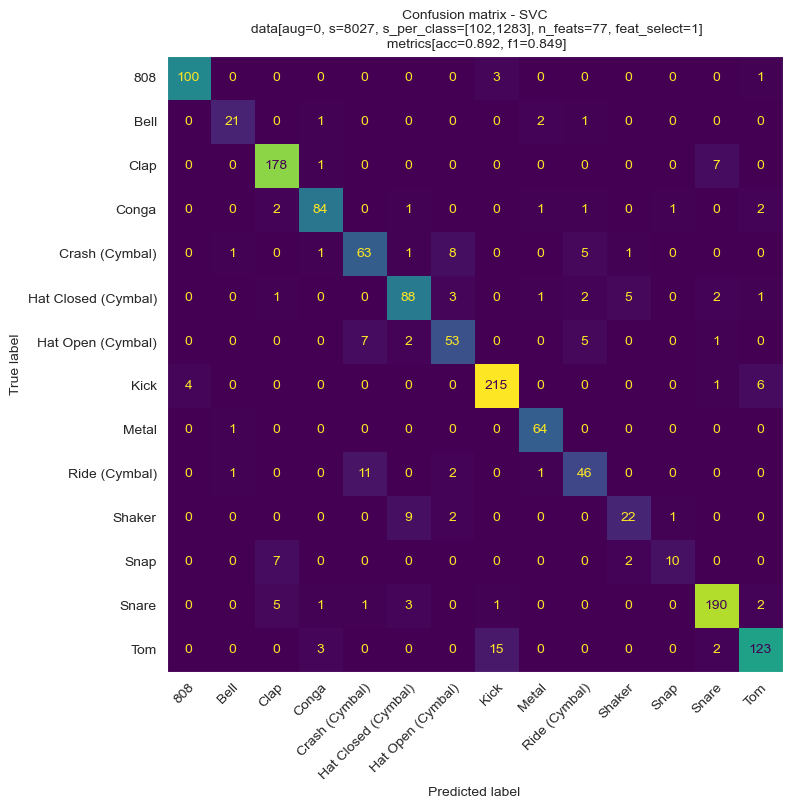

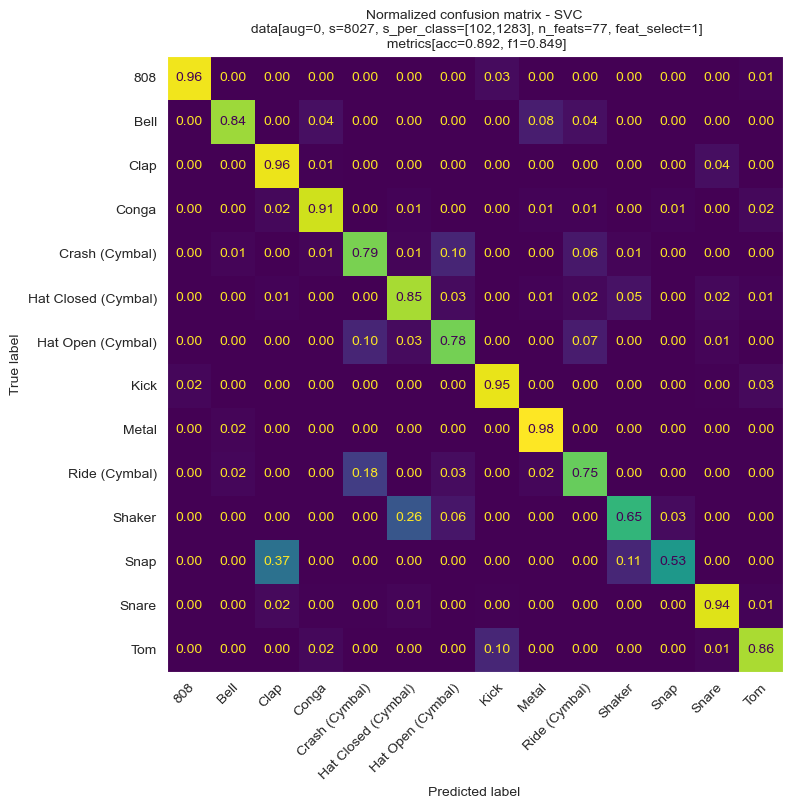

In [160]:
def plot_confusion_matrix_(y_test, y_pred, display_labels, normalize=False, title=None, save=True,
                           train_params_str=None):
    cm = confusion_matrix(y_test, y_pred, normalize='true' if normalize else None)
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    s = 8
    fig, ax = plt.subplots(figsize=(s, s))
    cmp.plot(ax=ax, colorbar=False,
             values_format=".2f" if normalize else None)  #, xticks_rotation='vertical', cmap=plt.cm.Blues

    title__ = "Normalized confusion matrix" if normalize else "Confusion matrix"
    if title:
        title__ += f" - {title}"

    if train_params_str:
        title__ += f"\n data[{train_params_str}]"

    title__ += f"\n metrics[acc={accuracy_score(y_test, y_pred):.3f}, f1={f1_score(y_test, y_pred, average='macro'):.3f}]"

    cmp.ax_.set_title(title__, fontsize=10)
    plt.grid(False)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

    # save figure
    if save:
        now_str = datetime.now().strftime("%Y%m%d")
        title__ = title__.replace("\n", " ")
        fig.savefig(f"{PROJECT_PATH}/plots/{now_str} {title__}.png", bbox_inches='tight')


# plot no normalized confusion matrix and normalized confusion matrix
def plot_confusion_matrix(y_test, y_pred, display_labels, normalize=None, title=None, save=True, train_params_str=None):
    for normalize in [False, True]:
        plot_confusion_matrix_(y_test, y_pred, display_labels, normalize=normalize, title=title, save=save,
                               train_params_str=train_params_str)


plot_confusion_matrix(y_test, y_pred_svc_no_augmented, display_labels=best_svc_no_augmented.classes_, normalize=False,
                      title=f"SVC", save=True, train_params_str=TRAIN_PARAMS_STR)

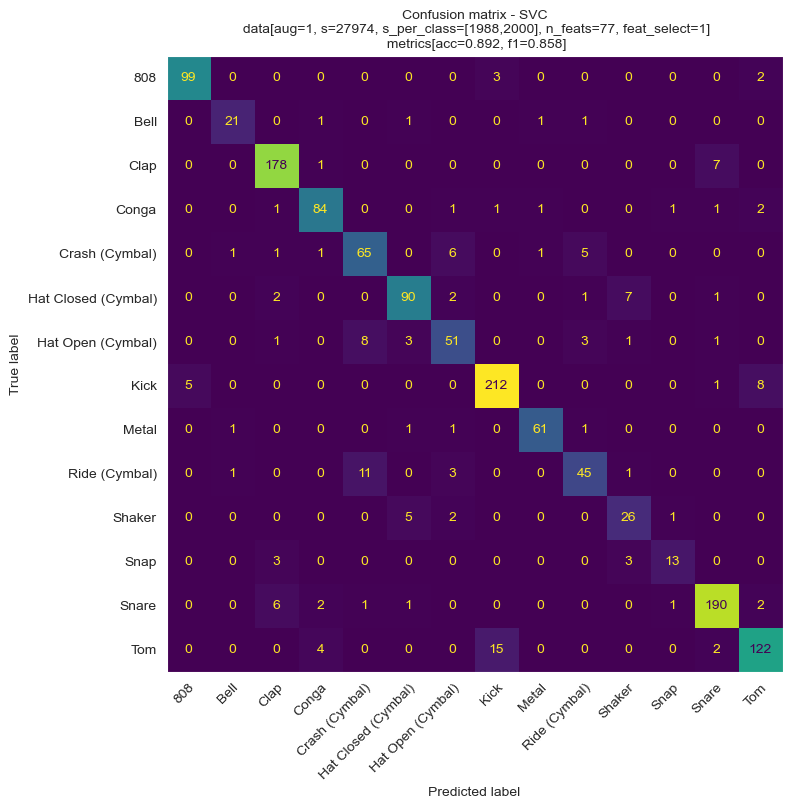

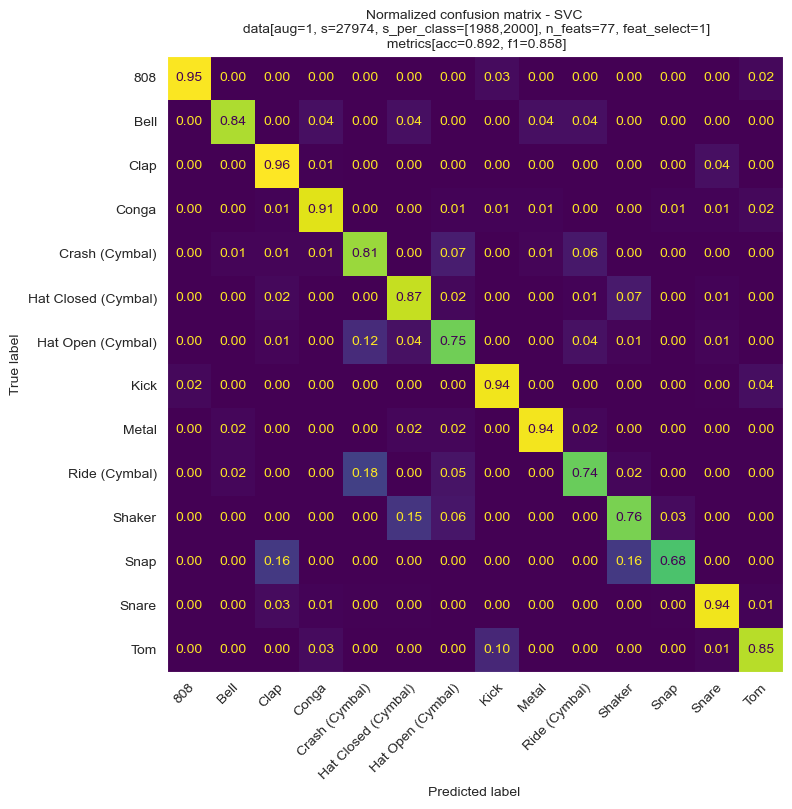

In [161]:
plot_confusion_matrix(y_test, y_pred_svc_augmented, display_labels=best_svc_augmented.classes_, normalize=False,
                      title=f"SVC", save=True, train_params_str=TRAIN_AUGMENTED_PARAMS_STR)

##### Report comparison (with and without augmentation)

In [162]:
def compare_classification_reports(report1: dict, report2: dict, model_name, train_params_str=TRAIN_PARAMS_STR,
                                   train_augmented_params_str=TRAIN_AUGMENTED_PARAMS_STR):
    # to dataframe
    df_report1 = report_dict_to_df(report1)
    df_report2 = report_dict_to_df(report2)

    # make the comparison
    df_diff = df_report1 - df_report2
    df_diff = df_diff.replace({0: np.nan})

    v = 0.3
    df_diff_ = df_diff.style.background_gradient(axis=None, cmap='cool', vmin=-v, vmax=v)
    # save
    now_str = datetime.now().strftime("%Y%m%d")
    output_file_path = f'{PROJECT_PATH}/plots/{now_str} Report comparison no_aug vs. aug - {model_name} data[{train_params_str}]+data[{train_augmented_params_str}].png'
    dfi.export(df_diff_, output_file_path)
    return df_diff_


reports_comparison_svc_df = compare_classification_reports(report_svc_no_augmented, report_svc_augmented, 'SVC')
reports_comparison_svc_df

,precision,recall,f1-score,support
808,0.009615,0.009615,0.009615,nan
Bell,nan,nan,nan,nan
Clap,-0.004804,nan,-0.002485,nan
Conga,0.019851,nan,0.009925,nan
Crash (Cymbal),0.003587,-0.025000,-0.010101,nan
Hat Closed (Cymbal),-0.044935,-0.019417,-0.032111,nan
Hat Open (Cymbal),0.006684,0.029412,0.018218,nan
Kick,0.001055,0.013274,0.006993,nan
Metal,-0.025589,0.046154,0.009487,nan
Ride (Cymbal),-0.036905,0.016393,-0.008900,nan


##### Cross validation scores

In [163]:
models_metrics_results[-2:]

[{'model_name': 'SCV data[aug=0, s=8027, s_per_class=[102,1283], n_feats=77, feat_select=1]',
  'model_trained': SVC(C=100, gamma=0.1),
  'acc_test': 0.8921220723917672,
  'f1_test': 0.8490935866931711,
  'acc_cv_scores_mean': 0.8706935960223973,
  'acc_cv_scores_std': 0.030324937825630026,
  'f1_cv_scores_mean': 0.8156517471597878,
  'f1_cv_scores_std': 0.04365628341058426},
 {'model_name': 'SCV data[aug=1, s=27974, s_per_class=[1988,2000], n_feats=77, feat_select=1]',
  'model_trained': SVC(C=10, gamma=1),
  'acc_test': 0.8921220723917672,
  'f1_test': 0.8577677005793791,
  'acc_cv_scores_mean': 0.8831743037252974,
  'acc_cv_scores_std': 0.020369794301854233,
  'f1_cv_scores_mean': 0.8829174870500994,
  'f1_cv_scores_std': 0.020488782596250803}]

### 💾 Sauvegarde du modèle

On sauvegarde le modèle dans le répertoire `models/` pour pouvoir le réutiliser plus tard.

In [165]:
def save_ml_model(model, model_name, scaler, features_columns):
    model_output_path = f"models/{model_name} {datetime.now().strftime('%Y%m%d_%H')}.pkl"
    with open(model_output_path, 'wb') as f:
        # save the model, the scaler and the features columns names
        pickle.dump(model, f)
        pickle.dump(scaler, f)
        pickle.dump(features_columns, f)
        print(f"> saved successfully '{model_output_path}'")


def get_saved_models():
    models = []
    for file in os.listdir("models/"):
        if file.endswith(".pkl"):
            models.append(file)
    return models


def print_saved_models():
    models = get_saved_models()
    if len(models) == 0:
        print("No saved models")
    else:
        print("Saved models:")
        for i, model in enumerate(models):
            print(f"{i + 1}. {model}")


def load_ml_model(model_path):
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model '{model_path}' not found")

    with open(model_path, 'rb') as f:
        # save the model, the scaler and the features columns names
        model = pickle.load(f)
        scaler = pickle.load(f)
        features_columns = pickle.load(f)
        print(f"> '{model_path}' loaded successfully")
        print(f">>> Model: {model}")
        print(f">>> Scaler: {scaler}")
        print(f">>> {len(features_columns)} Features columns: {features_columns[:5]} ... {features_columns[-5:]}")

        return model, scaler, features_columns

In [166]:
save_ml_model(model=best_svc_no_augmented, model_name=f"SVC data[{TRAIN_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)
save_ml_model(model=best_svc_augmented, model_name=f"SVC data[{TRAIN_AUGMENTED_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)

> saved successfully 'models/SVC data[aug=0, s=8027, s_per_class=[102,1283], n_feats=77, feat_select=1] 20230517_00.pkl'
> saved successfully 'models/SVC data[aug=1, s=27974, s_per_class=[1988,2000], n_feats=77, feat_select=1] 20230517_00.pkl'


In [167]:
model__, scaler__, features_columns__ = load_ml_model(
    "models/SVC data[aug=1, s=8393, s_per_class=[596,600], n_feats=98, feat_select=0] 20230512_21.pkl")
model__, scaler__, features_columns__

> 'models/SVC data[aug=1, s=8393, s_per_class=[596,600], n_feats=98, feat_select=0] 20230512_21.pkl' loaded successfully
>>> Model: SVC(C=100, gamma=0.1)
>>> Scaler: MinMaxScaler()
>>> 98 Features columns: ['duration', 'rms_log_sum', 'rms_log_mean', 'rms_log_max', 'rms_log_std'] ... ['spec_rolloff_85_std', 'spec_rolloff_15_mean', 'spec_rolloff_15_std', 'spec_contrast_mean', 'spec_contrast_std']


(SVC(C=100, gamma=0.1),
 MinMaxScaler(),
 ['duration',
  'rms_log_sum',
  'rms_log_mean',
  'rms_log_max',
  'rms_log_std',
  'rms_log_diff_abs_mean',
  'rms_log_crest_factor',
  'zcr_sum',
  'zcr_mean',
  'zcr_std',
  'zcr_loudest_frame',
  'temp_cent',
  'attack_time',
  'pitch',
  'mfcc_mean_1',
  'mfcc_mean_2',
  'mfcc_mean_3',
  'mfcc_mean_4',
  'mfcc_mean_5',
  'mfcc_mean_6',
  'mfcc_mean_7',
  'mfcc_mean_8',
  'mfcc_mean_9',
  'mfcc_mean_10',
  'mfcc_mean_11',
  'mfcc_mean_12',
  'mfcc_std_1',
  'mfcc_std_2',
  'mfcc_std_3',
  'mfcc_std_4',
  'mfcc_std_5',
  'mfcc_std_6',
  'mfcc_std_7',
  'mfcc_std_8',
  'mfcc_std_9',
  'mfcc_std_10',
  'mfcc_std_11',
  'mfcc_std_12',
  'mfcc_max_1',
  'mfcc_max_2',
  'mfcc_max_3',
  'mfcc_max_4',
  'mfcc_max_5',
  'mfcc_max_6',
  'mfcc_max_7',
  'mfcc_max_8',
  'mfcc_max_9',
  'mfcc_max_10',
  'mfcc_max_11',
  'mfcc_max_12',
  'mfcc_min_1',
  'mfcc_min_2',
  'mfcc_min_3',
  'mfcc_min_4',
  'mfcc_min_5',
  'mfcc_min_6',
  'mfcc_min_7',
  'mfcc_

### 🤖 RandomForestClassifier

Le modèle RandomForest est un modèle d'ensemble (ensemble learning) qui combine plusieurs modèles de type DecisionTreeClassifier. Il est donc plus robuste et moins sensible aux overfitting que les modèles de type DecisionTreeClassifier.

Ce modèle est très utilisé en pratique car il est très performant et facile à utiliser.

#### Optimisation des hyperparamètres

In [168]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Define the scoring metric
scorer = make_scorer(f1_score, average='macro')

# Instantiate the Random Forest model
rf = RandomForestClassifier()

# Instantiate GridSearchCV with the defined parameters and scoring metric
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, scoring=scorer, verbose=1, n_jobs=-1)

#### Fit on train data

In [169]:
# Fit the GridSearchCV object on the training data
grid_search_rf.fit(X_train_no_augmented, y_train_no_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# Make predictions on the test data using the best model
best_rf_no_augmented = grid_search_rf.best_estimator_
best_rf_no_augmented

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score:  0.7992308442649383


RandomForestClassifier(max_depth=30, max_features='auto', n_estimators=500)

#### Fit on augmented data

In [170]:
# Fit the GridSearchCV object on the training data
grid_search_rf.fit(X_train_augmented, y_train_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# Make predictions on the test data using the best model
best_rf_augmented = grid_search_rf.best_estimator_
best_rf_augmented

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score:  0.8397800133528147


RandomForestClassifier(max_depth=30, n_estimators=500)

#### ✅ Evaluation

In [171]:
scores, y_pred_rf_no_augmented, report_rf_no_augmented = compute_metrics_results(
    f"RandomForest data[{TRAIN_PARAMS_STR}]", best_rf_no_augmented, X_train_no_augmented, y_train_no_augmented, X_test,
    y_test)

# Add the scores and the model name to the list
models_metrics_results.append(scores)

# Print the classification report
display_report(report_rf_no_augmented, "RandomForest", params_str=TRAIN_PARAMS_STR)

Computing metrics for RandomForest data[aug=0, s=8027, s_per_class=[102,1283], n_feats=77, feat_select=1]...
...
...


,precision,recall,f1-score,support
808,0.990196,0.971154,0.980583,104
Kick,0.926407,0.946903,0.936543,226
Metal,0.936508,0.907692,0.921875,65
Conga,0.952941,0.880435,0.915254,92
Clap,0.859903,0.956989,0.905852,186
Snare,0.890476,0.921182,0.905569,203
Tom,0.895105,0.895105,0.895105,143
Hat Closed (Cymbal),0.819820,0.883495,0.850467,103
Hat Open (Cymbal),0.810811,0.882353,0.845070,68
Bell,0.950000,0.760000,0.844444,25


In [172]:
scores, y_pred_rf_augmented, report_rf_augmented = compute_metrics_results(
    f"RandomForest data[{TRAIN_AUGMENTED_PARAMS_STR}]", best_rf_augmented, X_train_augmented, y_train_augmented, X_test,
    y_test)

# Add the scores and the model name to the list
models_metrics_results.append(scores)

# Print the classification report
display_report(report_rf_augmented, "RandomForest", params_str=TRAIN_AUGMENTED_PARAMS_STR)

Computing metrics for RandomForest data[aug=1, s=27974, s_per_class=[1988,2000], n_feats=77, feat_select=1]...
...



KeyboardInterrupt



##### Confusion matrix

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf_no_augmented, display_labels=best_rf_no_augmented.classes_, normalize=False,
                      title=f"RandomForest", save=True, train_params_str=TRAIN_PARAMS_STR)

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf_augmented, display_labels=best_rf_augmented.classes_, normalize=False,
                      title=f"RandomForest", save=True, train_params_str=TRAIN_AUGMENTED_PARAMS_STR)

##### Report comparison (with/without augmented trainset)

In [ ]:
reports_comparison_rf_df = compare_classification_reports(report_rf_no_augmented, report_rf_augmented,
                                                          model_name="RandomForest")
reports_comparison_rf_df

##### Cross validation scores

In [ ]:
models_metrics_results[-2:]

#### Variables Importance

In [ ]:
for model, X_train, train_params in [(best_rf_no_augmented, X_train_no_augmented, TRAIN_PARAMS_STR),
                                     (best_rf_augmented, X_train_augmented, TRAIN_AUGMENTED_PARAMS_STR)]:
    feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    # barplot of feature importances (horizontal barchart)
    fig = plt.figure(figsize=(5, 17))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Significance Score Of Variables')
    plt.ylabel('Variables')
    title = f"Variable Importance - RandomForest \ndata[{train_params}]"
    plt.title(title)
    plt.show()
    # prinr head and tail of feature importances
    print("#" * 20, "head", "#" * 20)
    print(feature_imp.head(10))
    print("#" * 20, "tail", "#" * 20)
    print(feature_imp.tail(10))

    # save figure
    now_str = datetime.now().strftime("%Y%m%d")
    title = title.replace("\n", " ")
    fig.savefig(f"{PROJECT_PATH}/plots/{now_str} {title}.png", bbox_inches='tight')

On remarque que les variables les plus importantes sont

- "temp_cent" : le centroide temporel
- "attack_time" : le temps d'attaque
- "

#### 💾 Sauvegarde du modèle


In [ ]:
save_ml_model(model=best_rf_no_augmented, model_name=f"RandomForest data[{TRAIN_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)
save_ml_model(model=best_rf_augmented, model_name=f"RandomForest data[{TRAIN_AUGMENTED_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)


### 🤖 LGBMClassifier

#### Optimisation des hyperparamètres

In [ ]:
# Define the parameter grid to search over
params_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    #'num_leaves': [31, 63],
    #'min_child_samples': [20, 50],
    #'subsample': [0.8, 1],
    #'colsample_bytree': [0.8, 1],
}

# Define the scoring metric
scorer = make_scorer(f1_score, average='macro')

# Instantiate the LGBMClassifier model
lgbm = LGBMClassifier()

# Instantiate GridSearchCV with the defined parameters and scoring metric
grid_search_lgbm = GridSearchCV(lgbm, param_grid=param_grid, scoring=scorer, verbose=1, n_jobs=-1)


#### Fit on train data

In [ ]:
# Fit the GridSearchCV object on the training data
grid_search_lgbm.fit(X_train_no_augmented, y_train_no_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_lgbm.best_params_)
print("Best score: ", grid_search_lgbm.best_score_)

# Make predictions on the test data using the best model
best_lgbm_no_augmented = grid_search_lgbm.best_estimator_
best_lgbm_no_augmented

#### Fit on augmented data

In [ ]:
# Fit the GridSearchCV object on the training data
grid_search_lgbm.fit(X_train_augmented, y_train_augmented)

# Print the best parameters and best score
print("Best parameters: ", grid_search_lgbm.best_params_)
print("Best score: ", grid_search_lgbm.best_score_)

# Make predictions on the test data using the best model
best_lgbm_augmented = grid_search_lgbm.best_estimator_
best_lgbm_augmented

#### ✅ Evaluation

In [ ]:
scores, y_pred_lgbm_no_augmented, report_lgbm_no_augmented = compute_metrics_results(f"LGBM data[{TRAIN_PARAMS_STR}]",
                                                                                     best_lgbm_no_augmented,
                                                                                     X_train_no_augmented,
                                                                                     y_train_no_augmented, X_test,
                                                                                     y_test)

# Add the scores and the model name to the list
models_metrics_results.append(scores)

# Print the classification report
display_report(report_lgbm_no_augmented, "LGBM", params_str=TRAIN_PARAMS_STR)

In [ ]:

scores, y_pred_lgbm_augmented, report_lgbm_augmented = compute_metrics_results(
    f"LGBM data[{TRAIN_AUGMENTED_PARAMS_STR}]", best_lgbm_augmented, X_train_augmented, y_train_augmented, X_test,
    y_test)

# Add the scores and the model name to the list
models_metrics_results.append(scores)

# Print the classification report
display_report(report_lgbm_augmented, "LGBM", params_str=TRAIN_AUGMENTED_PARAMS_STR)

##### Confusion matrix

In [ ]:
plot_confusion_matrix(y_test, y_pred_lgbm_no_augmented, display_labels=best_lgbm_no_augmented.classes_, normalize=False,
                      title=f"LGBM", save=True, train_params_str=TRAIN_PARAMS_STR)

plot_confusion_matrix(y_test, y_pred_lgbm_augmented, display_labels=best_lgbm_augmented.classes_, normalize=False,
                      title=f"LGBM", save=True, train_params_str=TRAIN_AUGMENTED_PARAMS_STR)

##### Report comparison (with/without augmented trainset)

In [ ]:
reports_comparison_lgbm_df = compare_classification_reports(report_lgbm_no_augmented, report_lgbm_augmented, "LGBM")
reports_comparison_lgbm_df

In [ ]:
models_metrics_results[-2:]

#### Variables Importance

In [ ]:
for model, X_train, train_params in [(best_lgbm_no_augmented, X_train_no_augmented, TRAIN_PARAMS_STR),
                                     (best_lgbm_augmented, X_train_augmented, TRAIN_AUGMENTED_PARAMS_STR)]:
    feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    # barplot of feature importances (horizontal barchart)
    fig = plt.figure(figsize=(5, 17))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Significance Score Of Variables')
    plt.ylabel('Variables')
    title = f"Variable Importance - LGBM \ndata[{train_params}]"
    plt.title(title)
    plt.show()
    # prinr head and tail of feature importances
    print("#" * 20, "head", "#" * 20)
    print(feature_imp.head(10))
    print("#" * 20, "tail", "#" * 20)
    print(feature_imp.tail(10))

    # save figure
    now_str = datetime.now().strftime("%Y%m%d")
    title = title.replace("\n", " ")
    fig.savefig(f"{PROJECT_PATH}/plots/{now_str} {title}.png", bbox_inches='tight')

#### 💾 Sauvegarde du modèle

In [ ]:
save_ml_model(model=best_lgbm_no_augmented, model_name=f"LGBM data[{TRAIN_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)
save_ml_model(model=best_lgbm_augmented, model_name=f"LGBM data[{TRAIN_AUGMENTED_PARAMS_STR}]", scaler=scaler,
              features_columns=features_columns)

### Résultats des modèles


#### chargement des résultats

In [ ]:
len(models_metrics_results)

In [ ]:
df_models_metrics = pd.DataFrame(models_metrics_results)
df_models_metrics.dropna(subset=['acc_test', 'model_name'],
                         inplace=True)  # drop nan values in test_accuracy column and model_name column
df_models_metrics.drop_duplicates(subset=['model_name'], keep='last', inplace=True)
df_models_metrics.sort_values(by="acc_test", inplace=True, ascending=False)  # sort by test accuracy
df_models_metrics.set_index("model_name", inplace=True)
df_models_metrics

#### affichage des résultats

##### Tableau

In [ ]:
#df_models_metrics["data_info"] = df_models_metrics.index.str.split("data\[").str[1].str.split("\]").str[0]
# keep ***aug=0 or ***aug=1
#df_models_metrics.index = df_models_metrics.index.str.split(",").str[0]
# drop model trained column
#df_models_metrics.drop(columns=["model_trained"], inplace=True)

tmp = df_models_metrics.style.background_gradient(axis=None, vmin=0.6, vmax=1.0)
dfi.export(tmp,
           f'{PROJECT_PATH}/plots/{now_str} Compare metrics models - df_models_metrics - data[{TRAIN_PARAMS_STR}]+data[{TRAIN_AUGMENTED_PARAMS_STR}].png')
tmp

In [ ]:
df_models_metrics.columns

##### Plots

###### Test Score

In [ ]:
axs = df_models_metrics.plot(kind='barh', y=['acc_test', 'f1_test'], figsize=(8, 3 * 2), title="Models results",
                             subplots=True, legend=False)
from matplotlib.container import BarContainer

for ax in axs:
    max_value = max([rect.get_width() for rect in ax.containers[0]])

    ax.bar_label(ax.containers[0], fmt='{:.3f}')

plt.tight_layout()
plt.show()

fig = axs[0].get_figure()

# save figure

now_str = datetime.now().strftime("%Y%m%d")
fig.savefig(
    f"{PROJECT_PATH}/plots/{now_str} Compare metrics models - bars test - data[{TRAIN_PARAMS_STR}]+data[{TRAIN_AUGMENTED_PARAMS_STR}].png",
    bbox_inches='tight')

In [ ]:
# model with best score
df_models_metrics.sort_values(by=["f1_test"], ascending=False).head(1).T

In [ ]:
df_models_metrics.sort_values(by=["acc_test"], ascending=False).head(1).T

###### Cross Validation Train Score

In [ ]:
axs = df_models_metrics.plot(kind='barh', y=['acc_cv_scores_mean', 'f1_cv_scores_mean'], figsize=(8, 3 * 2),
                             title="Models results", subplots=True, legend=False)

for ax in axs:
    ax.bar_label(ax.containers[0], fmt='{:.3f}')

plt.show()

# save figure
fig = axs[0].get_figure()
now_str = datetime.now().strftime("%Y%m%d")
fig.savefig(
    f"{PROJECT_PATH}/plots/{now_str} Compare metrics models - bars cv - data[{TRAIN_PARAMS_STR}]+data[{TRAIN_AUGMENTED_PARAMS_STR}].png",
    bbox_inches='tight')

In [ ]:
df_models_metrics.sort_values(by=['acc_cv_scores_mean'], ascending=False).head(1).T

In [ ]:
df_models_metrics.sort_values(by=['f1_cv_scores_mean'], ascending=False).head(1).T

### Conclusion et analyse des résultats

Ensembles des résultats obtenus par les différents modèles :

![](../images/img_13.png)

Parmi les trois modèles, le **LGBM s'est révélé être le plus performant** en termes de F1-score sur le jeu de données de test et lors de la validation croisée. Cela confirme sa capacité à bien détecter les différentes classes de sons et à produire des prédictions précises. Toutefois, il convient de noter que le temps d'entraînement du LGBM est significativement plus long (environ 6 heures) par rapport aux deux autres modèles (moins d'une heure). Cette différence peut être attribuée à la complexité de l'algorithme utilisé par le LGBM, qui permet d'obtenir de meilleures performances, mais nécessite plus de temps de calcul.

Le choix du meilleur modèle dépend de plusieurs facteurs.  Si l'efficacité et la rapidité d'entraînement sont des critères importants, il peut être préférable d'opter pour un modèle plus simple comme le RandomForest ou le SVC, qui ont montré des performances légèrement inférieures mais qui peuvent être entraînés plus rapidement. Cela permettrait une meilleure généralisation et une mise en production plus facile, en évitant des temps d'attente prolongés lors de l'entraînement du modèle. En revanche, si les performances sont la priorité absolue et que la capacité à bien détecter les subtilités des sons de percussions est primordiale, le LGBM reste le choix optimal. Malgré son temps d'entraînement plus long, il offre des performances supérieures et peut être particulièrement adapté aux applications nécessitant une précision maximale dans la classification des sons.

Dans notre cas, compte tenu des performances élevées du LGBM dans notre tâche de classification des sons de percussions, c'est lui que l'on va retenir pour la suite de notre projet. Car le temps d'entrainement n'est pas un facteur limitant pour notre projet. C'est donc le modèle que nous allons utiliser pour la suite de notre projet, celui qui sera le coeur de notre application "DrumClassifier".

## Application "DrumClassifier"

L'application "DrumClassifier" est une application web qui permet de classer automatiquement des sons de percussions. Elle est basée sur le modèle LGBM que nous avons entraîné précédemment. Elle est développée en Python avec la librairie Streamlit.

> Pour lancer l'application, lire le fichier `README.md` du projet.

![](../images/streamlit_screen2.png)


## Conclusion

Au cours de notre dernière année de cycle ingénieur, j'ai du réaliser un projet de fin d'études. J'ai choisi de travailler sur un sujet complexe qui marie parfaitement ma passion pour l'audio et mes compétences d'ingénieur IA : La classification de sons de percussions.

Après avoir rassemblé et prétraité une grande variété de données sonores - analyser et extrait des caractéristiques audio pertinentes, enrichis notre jeu de données avec l'audio data augmentation et testé différents modèles de machine learning pour réaliser notre objectif - mon regard s'est porté sur trois modèles  performants : le Support Vector Classifier, le Random Forest et le Light Gradient Boosting Machine. C'est ce dernier que j'ai choisi de retenir pour la suite de mon projet, car il a montré les meilleures performances sur notre jeu de données de test et lors de la validation croisée.

Ce projet, avant tout, était un défi personnel, j'ai décidé de le réaliser seul. Cependant, je pense qu'il aurait été intéressant de travailler en équipe. En effet, car si le temps l'avait permis, j'aurais aimé explorer l'application de réseaux de neurones profonds à notre problème, en utilisant des librairies telles que :
- PyTorch : librairie populaire pour contruire et entrainer des réseaux de neurones profonds.
- torchAudio : librairie spécialisée dans le traitement du signal audio avec PyTorch.
Par la suite, nous aurions pu comparer les performances de ces modèles avec celles des modèles de machine learning classiques que nous avons utilisés ; et pouvoir prouver correctement que l'on peut créer des outils audio performants sans entraîner de gros réseaux de neurones, sans forcément puiser dans les ressources exigeantes du deep learning.

J'ai pu développé l'application "DrumClassifier", une application simple d'usage et interactive.
Cette application vous permet de classer et d'organiser vos propres drumkits et audios.
Les beatmakers et les professionnels de l'audio pourront l'utiliser pour organiser instantanément leur drumkits, et ainsi gagner un temps considérable, en évitant la frustration de rechercher le son parfait pendant des heures.

Pour l'avenir, j'entrevois plusieurs perspectives d'amélioration. je pourrai explorer d'autres techniques de Feature Engineering. En effet, par exemple pour réduire la dimensionnalité de nos données, nous pourrions utiliser des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) ou l'analyse en composantes indépendantes (ICA). Au vue du nombre de audio features possibles, nous pourrions également extraire d'autres caractéristiques audio, des plus avancées et plus intelligentes. De plus, l'utilisation de réseaux de neurones profonds, comme je l'ai mentionné précédemment, pourrait également apporter de l'intérêt à notre projet. Et pour finir nous pourrions envisager d'utiliser des modèles de génération de données, tels que [WaveGAN](https://chrisdonahue.com/wavegan_examples/) (dem, un réseau de neurones GAN spécifiquement conçu pour la génération de signaux audio. Cette approche nous permettrait d'élargir notre jeu de données en créant de nouveaux échantillons de percussions de manière synthétique. Cela pourrait être particulièrement utile pour les classes qui sont sous-représentées dans notre jeu de données initial. En incorporant de tels modèles dans notre pipeline de data augmentation, nous pourrions améliorer davantage la performance de notre modèle tout en diversifiant encore plus notre jeu de données.

Un des apprentissages clés de ce projet de fin d'étude a été l'importance de la gestion du temps. La préparation des données, notamment, a pris une part significative de notre temps. Si je devais refaire ce projet, je prendrais en compte dès le départ l'ampleur de cette tâche pour mieux planifier et optimiser le processus.

En somme, ce projet a été une expérience enrichissante et une opportunité pour moi. Il a été une étape importante de mon parcours académique, me préparant à relever les défis futurs avec confiance et détermination et en me confortant dans mon choix de spécialisation : l'ia et l'audio.

## Bibliographie

- https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e
- https://www.soundsandwords.io/drum-sound-classification/
- https://pub.towardsai.net/building-an-audio-classification-model-for-automatic-drum-transcription-heres-what-i-learnt-a84f03d53413
- https://www.scielo.org.mx/scielo.php?pid=S1405-55462021000200351&script=sci_arttext
- https://www.researchgate.net/publication/280490270_Automatic_Classification_of_Drum_Sounds_with_Indefinite_Pitch
- https://www.youtube.com/playlist?list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0
- https://www.youtube.com/playlist?list=PL-wATfeyAMNoR4aqS-Fv0GRmS6bx5RtTW
